In [2]:
import __future__
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
features= pd.read_csv('features.csv')

In [3]:
features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [4]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [5]:
features.shape

(8190, 12)

In [6]:
features.columns 

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [7]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [8]:
features.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# •	Task 1.1: Calculate the mean, median, and mode for each of the following columns:
# o	Temperature
# o	Fuel_Price
# o	CPI
# o	Unemployment
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in columns:
    mean_val = features[col].mean()
    median_val = features[col].median()
    mode_val = features[col].mode().iloc[0] 

    print(f"\nColumn: {col}")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Mode: {mode_val:.2f}")


Column: Temperature
Mean: 59.36
Median: 60.71
Mode: 50.43

Column: Fuel_Price
Mean: 3.41
Median: 3.51
Mode: 3.42

Column: CPI
Mean: 172.46
Median: 182.76
Mode: 132.72

Column: Unemployment
Mean: 7.83
Median: 7.81
Mode: 8.10


In [10]:
# •	Task 2.1: Calculate the range (max - min) of each numerical column.
numerical_cols = features.select_dtypes(include=[np.number]).columns
print("Range (Max - Min) for each numerical column:\n")
for col in numerical_cols:
    col_max = features[col].max()
    col_min = features[col].min()
    col_range = col_max - col_min
    print(f"{col}: {col_range:.2f}")


Range (Max - Min) for each numerical column:

Store: 44.00
Temperature: 109.24
Fuel_Price: 2.00
MarkDown1: 105966.43
MarkDown2: 104785.30
MarkDown3: 149662.57
MarkDown4: 67474.63
MarkDown5: 771633.27
CPI: 102.91
Unemployment: 10.63


In [11]:
# •	Task 2.2: Compute the standard deviation and variance for:
# o	Temperature, Fuel_Price, CPI, Unemployment, MarkDown1–5
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
           'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

print("Standard Deviation and Variance:\n")
for col in columns:          
    std_dev = features[col].std()
    variance = features[col].var()
    print(f"{col}:\n  Std Dev = {std_dev:.2f}, Variance = {variance:.2f}")


Standard Deviation and Variance:

Temperature:
  Std Dev = 18.68, Variance = 348.89
Fuel_Price:
  Std Dev = 0.43, Variance = 0.19
CPI:
  Std Dev = 39.74, Variance = 1579.14
Unemployment:
  Std Dev = 1.88, Variance = 3.52
MarkDown1:
  Std Dev = 9262.75, Variance = 85798490.28
MarkDown2:
  Std Dev = 8793.58, Variance = 77327102.25
MarkDown3:
  Std Dev = 11276.46, Variance = 127158599.93
MarkDown4:
  Std Dev = 6792.33, Variance = 46135744.95
MarkDown5:
  Std Dev = 13086.69, Variance = 171261462.44


In [12]:
# •	Task 3.1: Calculate the 25th, 50th, and 75th percentiles for Fuel_Price, CPI, and all MarkDown columns
columns = ['Fuel_Price', 'CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
print("25th, 50th, and 75th Percentiles:\n")
for col in columns:
    q25 = features[col].quantile(0.25)
    q50 = features[col].quantile(0.50)  # or use .median()
    q75 = features[col].quantile(0.75)
print(f"{col}:\n  25th Percentile = {q25:.2f}\n  50th Percentile = {q50:.2f}\n  75th Percentile = {q75:.2f}\n")


25th, 50th, and 75th Percentiles:

MarkDown5:
  25th Percentile = 1440.83
  50th Percentile = 2727.14
  75th Percentile = 4832.56



In [13]:
# •	Task 3.2: Compute the Interquartile Range (IQR) for the above.
columns = ['Fuel_Price', 'CPI', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
print("Interquartile Range (IQR):\n")
for col in columns:
    q1 = features[col].quantile(0.25)
    q3 = features[col].quantile(0.75)
    iqr = q3 - q1
    print(f"{col}: IQR = {iqr:.2f}")


Interquartile Range (IQR):

Fuel_Price: IQR = 0.70
CPI: IQR = 81.57
MarkDown1: IQR = 7345.78
MarkDown2: IQR = 2084.47
MarkDown3: IQR = 156.55
MarkDown4: IQR = 3005.32
MarkDown5: IQR = 3391.73


In [14]:
# •	Task 4.1: Compute the z-score for Fuel_Price and Temperature columns.
features['Fuel_Price_z'] = (features['Fuel_Price'] - features['Fuel_Price'].mean()) / features['Fuel_Price'].std()
features['Temperature_z'] = (features['Temperature'] - features['Temperature'].mean()) / features['Temperature'].std()

print(features[['Fuel_Price', 'Fuel_Price_z', 'Temperature', 'Temperature_z']].head())


   Fuel_Price  Fuel_Price_z  Temperature  Temperature_z
0       2.572     -1.933506        42.31      -0.912605
1       2.548     -1.989147        38.51      -1.116047
2       2.514     -2.067972        39.93      -1.040024
3       2.561     -1.959008        46.63      -0.681325
4       2.625     -1.810632        46.50      -0.688285


In [15]:
# •	Task 4.2: Identify and count outliers using z-score > 3 or < -3.
features['Fuel_Price_z'] = (features['Fuel_Price'] - features['Fuel_Price'].mean()) / features['Fuel_Price'].std()
features['Temperature_z'] = (features['Temperature'] - features['Temperature'].mean()) / features['Temperature'].std()

fuel_outliers = features[(features['Fuel_Price_z'] > 3) | (features['Fuel_Price_z'] < -3)]
temp_outliers = features[(features['Temperature_z'] > 3) | (features['Temperature_z'] < -3)]

print(f"Fuel_Price Outliers: {fuel_outliers.shape[0]}")
print(f"Temperature Outliers: {temp_outliers.shape[0]}")


Fuel_Price Outliers: 0
Temperature Outliers: 7


In [16]:
# •	Task 5.1: Calculate CV for Temperature, Fuel_Price, CPI, Unemployment:
# CV= (Standard Deviation/Mean)*100% 
columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

print("Coefficient of Variation (CV %):\n")
for col in columns:
    mean_val = features[col].mean()
    std_dev = features[col].std()
    cv = (std_dev / mean_val) * 100
    print(f"{col}: CV = {cv:.2f}%")


Coefficient of Variation (CV %):

Temperature: CV = 31.47%
Fuel_Price: CV = 12.66%
CPI: CV = 23.04%
Unemployment: CV = 23.98%


In [17]:
# •	Task 6.1: Calculate skewness for numerical columns
numerical_cols = features.select_dtypes(include=[np.number]).columns

print("Skewness of Numerical Columns:\n")
for col in numerical_cols:
    skew = features[col].skew()
    print(f"{col}: Skewness = {skew:.2f}")


Skewness of Numerical Columns:

Store: Skewness = 0.00
Temperature: Skewness = -0.28
Fuel_Price: Skewness = -0.31
MarkDown1: Skewness = 4.02
MarkDown2: Skewness = 4.96
MarkDown3: Skewness = 8.13
MarkDown4: Skewness = 4.86
MarkDown5: Skewness = 50.28
CPI: Skewness = 0.07
Unemployment: Skewness = 1.07
Fuel_Price_z: Skewness = -0.31
Temperature_z: Skewness = -0.28


In [18]:
# •	Task 6.2: Calculate kurtosis to understand tail distribution.
numerical_cols = features.select_dtypes(include=[np.number]).columns

print("Kurtosis of Numerical Columns:\n")
for col in numerical_cols:
    kurt = features[col].kurtosis()
    print(f"{col}: Kurtosis = {kurt:.2f}")


Kurtosis of Numerical Columns:

Store: Kurtosis = -1.20
Temperature: Kurtosis = -0.61
Fuel_Price: Kurtosis = -0.95
MarkDown1: Kurtosis = 23.69
MarkDown2: Kurtosis = 32.34
MarkDown3: Kurtosis = 72.07
MarkDown4: Kurtosis = 29.00
MarkDown5: Kurtosis = 2923.06
CPI: Kurtosis = -1.83
Unemployment: Kurtosis = 2.50
Fuel_Price_z: Kurtosis = -0.95
Temperature_z: Kurtosis = -0.61


In [19]:
# •	Task 7.1: Group by IsHoliday and calculate:
# o	Mean and std of all markdown columns.
# o	Mean Fuel_Price and Temperature
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

grouped = features.groupby('IsHoliday').agg(
    {**{col: ['mean', 'std'] for col in markdown_cols},
     'Fuel_Price': 'mean',
     'Temperature': 'mean'}
)

grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
print(grouped)



           MarkDown1_mean  MarkDown1_std  MarkDown2_mean  MarkDown2_std  \
IsHoliday                                                                 
False         6621.591146    7689.282701     2549.117008    5969.333786   
True         11896.328535   19418.858887    11684.731423   20429.057957   

           MarkDown3_mean  MarkDown3_std  MarkDown4_mean  MarkDown4_std  \
IsHoliday                                                                 
False          252.276325    1144.329016     3019.268943    5897.762771   
True         18472.234816   34945.532922     6357.234754   12788.867339   

           MarkDown5_mean  MarkDown5_std  Fuel_Price_mean  Temperature_mean  
IsHoliday                                                                    
False         4225.809309   13602.784483         3.415351         60.194901  
True          3022.472190    2582.114545         3.284323         48.453060  


In [20]:
# •	Task 7.2: Group by Store and calculate average CPI, Fuel_Price, and Unemployment.
store_group = features.groupby('Store')[['CPI', 'Fuel_Price', 'Unemployment']].mean()
print(store_group.head())  # Show first few rows for brevity


              CPI  Fuel_Price  Unemployment
Store                                      
1      217.271679    3.259242      7.440994
2      216.918640    3.259242      7.403959
3      220.690122    3.259242      7.006006
4      129.197091    3.254885      5.647450
5      217.844357    3.259242      6.163166


In [21]:
# •	Task 8.1: Count missing values for MarkDown1–5, CPI, Unemployment.
cols_to_check = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
missing_counts = features[cols_to_check].isnull().sum()

print("Missing Values Count:\n")
print(missing_counts)


Missing Values Count:

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64


In [22]:
# •	Task 9.2: Fill missing values using:
# o	Mean
# o	Median
# o	Forward fill

features['CPI'].fillna(features['CPI'].mean(), inplace=True)
features['CPI'].fillna(method='ffill', inplace=True)


In [ ]:
# •	Task 9.2: Fill missing values using:
# o	Mean
# o	Median
# o	Forward fill

features['CPI'].fillna(features['CPI'].mean(), inplace=True)
features['CPI'].fillna(method='ffill', inplace=True)


In [25]:
# •	Task 9.2: Fill missing values using:
# o	Mean
# o	Median
# o	Forward fill

features['CPI'].fillna(features['CPI'].mean(), inplace=True)
features['CPI'].fillna(method='ffill', inplace=True)


In [24]:
# •	Task 9.2: Fill missing values using:
# o	Mean
# o	Median
# o	Forward fill

features['CPI'].fillna(features['CPI'].mean(), inplace=True)
features['CPI'].fillna(method='ffill', inplace=True)


<AxesSubplot:xlabel='IsHoliday', ylabel='Fuel_Price'>

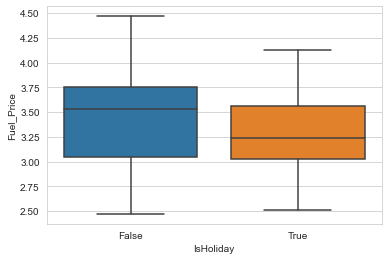

In [23]:
# •	Task 10.1: Plot box plots for each numerical column (to visualize spread and outliers).

sns.boxplot(x='IsHoliday', y='Fuel_Price', data=features)

